In [0]:
# 패키지 임포트
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 슬롯 팔 생성
class SlotArm():
    # 슬롯 팔 초기화
    def __init__(self, p):
        self.p = p # 코인이 나올 확률

    # 팔을 선택했을 때의 보상 취득
    def draw(self):
        if self.p > random.random() :
            return 1.0
        else:
            return 0.0

In [0]:
# ε-greedy 계산 처리
class EpsilonGreedy():
    # ε-greedy 계산 처리 초기화
    def __init__(self, epsilon):
        self.epsilon = epsilon # 탐색하는 확률

    # 시행 횟수와 가치 초기화
    def initialize(self, n_arms):
        self.n = np.zeros(n_arms) # 각 팔의 시행 횟수
        self.v = np.zeros(n_arms) # 각 팔의 가치

    # 팔 선택
    def select_arm(self):
        if self.epsilon > random.random():
            # 랜덤으로 팔 선택
            return np.random.randint(0, len(self.v))
        else:
            # 가치가 높은 팔 선택
            return np.argmax(self.v)

    # 알고리즘 파라미터 갱신
    def update(self, chosen_arm, reward, t):
        # 선택한 팔의 시행 횟수 +1
        self.n[chosen_arm] += 1

        # 선택한 팔의 가치 갱신
        n = self.n[chosen_arm]
        v = self.v[chosen_arm]
        self.v[chosen_arm] = ((n-1) / float(n)) * v + (1 / float(n)) * reward

    # 문자열 정보 취득
    def label(self):
        return 'ε-greedy('+str(self.epsilon)+')'

In [0]:
# UCB1 알고리즘
class UCB1():
    # 시행 횟수, 성공 횟수, 및 가치 초기화
    def initialize(self, n_arms): 
        self.n = np.zeros(n_arms) # 각 팔의 시행 횟수
        self.w = np.zeros(n_arms) # 각 팔의 성공 횟수
        self.v = np.zeros(n_arms) # 각 팔의 가치
    
    # 팔 선택
    def select_arm(self):
        # n이 모두 1 이상이 되도록 팔을 선택
        for i in range(len(self.n)):
            if self.n[i] == 0:
                return i
        
        # 가치가 높은 말을 선택
        return np.argmax(self.v)
        
    # 알고리즘의 파라미터 갱신
    def update(self, chosen_arm, reward, ｔ):
        # 선택한 팔의 시행 횟수 +1
        self.n[chosen_arm] += 1

        # 성공 시, 선택한 팔의 성공 횟수 +1
        if reward == 1.0:
            self.w[chosen_arm] += 1
        
        # 시행 횟수가 0인 팔이 존재하는 경우에는 가치를 갱신하지 않음
        for i in range(len(self.n)):
            if self.n[i] == 0:
                return
        
        # 각 팔의 가치 갱신
        for i in range(len(self.v)):
            self.v[i] = self.w[i] / self.n[i] + (2 * math.log(t) / self.n[i]) ** 0.5
        
    # 문자열 정보 취득
    def label(self):
        return 'ucb1'

In [0]:
# 시뮬레이션 실행
def play(algo, arms, num_sims, num_time):
    # 이력 준비
    times = np.zeros(num_sims * num_time) # 게임 횟수 중 몇 번째인가
    rewards = np.zeros(num_sims * num_time) # 보상

    # 시뮬레이션 횟수 만큼 반복
    for sim in range(num_sims):
        algo.initialize(len(arms)) # 알고리즘 설정 초기화

        # 게임 횟수 만큼 반복
        for time in range(num_time):
            # 인덱스 계산
            index = sim * num_time + time

            # 이력 계산
            times[index] = time+1
            chosen_arm = algo.select_arm()
            reward = arms[chosen_arm].draw()
            rewards[index] = reward

            # 알고리즘 파라미터 갱신
            algo.update(chosen_arm, reward, time+1)

    # [게임 회차, 보상]
    return [times, rewards]

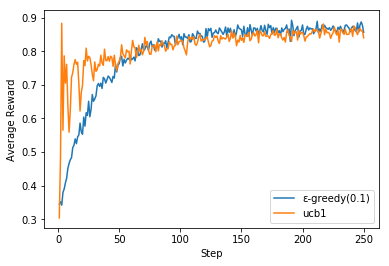

In [0]:
# 게임 준비
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

# 알고리즘 준비
algos = (EpsilonGreedy(0.1),  UCB1())

for algo in algos:
    # 시뮬레이션 실행
    results = play(algo, arms, 1000, 250)
    
    # 클래스 표시
    df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
    mean = df['rewards'].groupby(df['times']).mean()
    plt.plot(mean, label=algo.label()) 

# 그래프 표시
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()